# Importation of major Libraries required by the entire project.

In [1]:
#Projects Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Stats Model Library
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant

#sklearn Library
from sklearn import linear_model,feature_selection,preprocessing,model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler


#Projects Additional yet important libraries
import locale
import scipy, scipy.stats


# Data Preparation

* In this section I will import the required data and drop the columns of uneccessary data.
* I will the clean the data by dealing with any null values in the data.

## Data  Importation

In [2]:
#Importing required csv data as a pandas dataframe
dataset1 = pd.read_csv('england_school_information.csv')
dataset2 = pd.read_csv('england_swf.csv')
print(dataset1.info())
print(dataset2.info())
dataset1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25414 entries, 0 to 25413
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   URN          25414 non-null  int64  
 1   LANAME       25414 non-null  object 
 2   LA           25414 non-null  int64  
 3   ESTAB        25414 non-null  int64  
 4   LAESTAB      25414 non-null  int64  
 5   SCHNAME      25414 non-null  object 
 6   STREET       25317 non-null  object 
 7   LOCALITY     14173 non-null  object 
 8   ADDRESS3     1659 non-null   object 
 9   TOWN         25085 non-null  object 
 10  POSTCODE     25378 non-null  object 
 11  SCHSTATUS    25414 non-null  object 
 12  OPENDATE     1533 non-null   object 
 13  CLOSEDATE    1670 non-null   object 
 14  MINORGROUP   25414 non-null  object 
 15  SCHOOLTYPE   25414 non-null  object 
 16  ISPRIMARY    25414 non-null  int64  
 17  ISSECONDARY  25414 non-null  int64  
 18  ISPOST16     25414 non-null  int64  
 19  AGEL

,URN,LANAME,LA,ESTAB,LAESTAB,SCHNAME,STREET,LOCALITY,ADDRESS3,TOWN,...,MINORGROUP,SCHOOLTYPE,ISPRIMARY,ISSECONDARY,ISPOST16,AGELOW,AGEHIGH,GENDER,RELCHAR,ADMPOL
0,100000,City of London,201,3614,2013614,The Aldgate School,St James's Passage,Duke's Place,NaN,London,...,Maintained school,Voluntary aided school,1,0,0,3.0,11.0,Mixed,Church of England,Not applicable
1,100001,City of London,201,6005,2016005,City of London School for Girls,St Giles' Terrace,Barbican,NaN,London,...,Independent school,Other independent school,1,1,1,7.0,18.0,Girls,None,Not applicable
2,100002,City of London,201,6006,2016006,St Paul's Cathedral School,2 New Change,NaN,NaN,London,...,Independent school,Other independent school,1,1,0,4.0,13.0,Mixed,Church of England,Not applicable
3,100003,City of London,201,6007,2016007,City of London School,107 Queen Victoria Street,NaN,NaN,London,...,Independent school,Other independent school,1,1,1,10.0,18.0,Boys,None,Not applicable
4,100008,Camden,202,2019,2022019,Argyle Primary School,Tonbridge Street,NaN,NaN,London,...,Maintained school,Community school,1,0,0,3.0,11.0,Mixed,Does not apply,Not applicable
5,100009,Camden,202,2036,2022036,Beckford Primary School,Dornfell Street,West Hampstead,NaN,London,...,Maintained school,Community school,1,0,0,3.0,11.0,Mixed,Does not apply,Not applicable
6,100010,Camden,202,2065,2022065,Brecknock Primary School,Cliff Villas,NaN,NaN,London,...,Maintained school,Community school,1,0,0,2.0,11.0,Mixed,Does not apply,Not applicable
7,100011,Camden,202,2078,2022078,Brookfield Primary School,Chester Road,NaN,NaN,London,...,Maintained school,Community school,1,0,0,3.0,11.0,Mixed,Does not apply,Not applicable
8,100012,Camden,202,2095,2022095,Carlton Primary School,Grafton Road,NaN,NaN,London,...,Maintained school,Community school,1,0,0,3.0,11.0,Mixed,Does not apply,Not applicable
9,100013,Camden,202,2184,2022184,Edith Neville Primary School,174 Ossulston Street,NaN,NaN,London,...,Maintained school,Community school,1,0,0,3.0,11.0,Mixed,Does not apply,Not applicable


## Dropping unnecessary columns
* In Data 1 we only need afew columns which we will combine with Data to accomplish the task
* So we will Retain URN, LA, SCHNAME, TOWN, MINORGROUP, SCHOOLTYPE, ISPRIMARY, ISSECONDARY, ISPOST16, GENDER
* In data 2 we drop Establishment Number for it as unique as URN  

In [3]:
#Data 1 
dataset1 = dataset1[['URN','LA','LANAME','SCHNAME','TOWN','MINORGROUP','SCHOOLTYPE','ISPRIMARY','ISSECONDARY','ISPOST16','GENDER']]
#Data 2
dataset2 = dataset2.drop('Establishment Number',axis=1)

## Merging the two datas into one

In [4]:
# A function to create a new column in data 2 based on data 1 values(URN).
def clmn_creator(df,column="",compare=""):
    f_df=dataset2.copy()
    ls=[]
    for i in f_df[compare]:
        line_selector = df.URN == i
        ls.append(list(df.loc[line_selector, column]))
    return np.asarray(ls).reshape(-1)
n_minogoup = clmn_creator(dataset1,"MINORGROUP",'URN')
n_shtype = clmn_creator(dataset1,"SCHOOLTYPE",'URN')
n_schname = clmn_creator(dataset1,"SCHNAME",'URN')
n_gender = clmn_creator(dataset1,"GENDER",'URN')
n_laname = clmn_creator(dataset1,"LANAME",'URN')

In [5]:
# merging the dataset2 with new values
dataset2["MINORGROUP"]=n_minogoup
dataset2["SCHOOLTYPE"]=n_shtype
dataset2["SCHNAME"]=n_schname
dataset2["GENDER"]=n_gender
dataset2['LANAME']=n_laname
print(dataset2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8178 entries, 0 to 8177
Data columns (total 16 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   LA Number                                                                                                   8178 non-null   int64  
 1   URN                                                                                                         8178 non-null   int64  
 2   School Phase                                                                                                8178 non-null   object 
 3   Total Number of Teachers (Headcount)                                                                        8137 non-null   float64
 4   Total Number of Teaching Assistants (Headcount)                   

## Handling missing values

* The number of rows containing missing values is not that much so dropping them is not that costly

In [6]:
df = dataset2.copy()
df = df.rename(columns={'Pupil:     Teacher Ratio':'Pupil:Teacher Ratio'})
print(df.isna().sum())
df.dropna(inplace=True)

"""
I noticed some strange values in the 'Mean Gross FTE Salary of All Teachers (£s)' 
column with value 'SUPP' the are about 55 and about 8 in 'Pupil-Teacher Ratio'.
it is safer to drop them.
"""
indexnames=df[df['Mean Gross FTE Salary of All Teachers (£s)']=='SUPP'].index
df.drop(indexnames,inplace=True)
r_indexnames = df[df['Pupil:Teacher Ratio']== 'SUPP'].index
df.drop(r_indexnames,inplace=True)
print(df.info())

LA Number                                                                                                      0
URN                                                                                                            0
School Phase                                                                                                   0
Total Number of Teachers (Headcount)                                                                          41
Total Number of Teaching Assistants (Headcount)                                                               41
Total Number of Non Classroom-based School Support Staff, Excluding Auxiliary Staff (Headcount)               41
Total Number of Teachers (Full-Time Equivalent)                                                               41
Total Number of Teaching Assistants (Full-time Equivalent)                                                    41
Total Number of Non Classroom-based School Support Staff, Excluding Auxiliary Staff (Full-Time E

In [7]:
# COnverting the currency ie(Mean Gross FTE Salary of All Teachers (£s)) into valid floating digits
list(df['Mean Gross FTE Salary of All Teachers (£s)'].values.reshape(-1))
df['Mean Gross FTE Salary of All Teachers (£s)'] = df['Mean Gross FTE Salary of All Teachers (£s)'].apply(lambda x: x.replace('£','')).apply(lambda x: x.replace(',','')).astype(float)
df.info()
# Converting Teacher to student Ratio to numeric
df['Pupil:Teacher Ratio'] = pd.to_numeric(df['Pupil:Teacher Ratio'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8072 entries, 0 to 8176
Data columns (total 16 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   LA Number                                                                                                   8072 non-null   int64  
 1   URN                                                                                                         8072 non-null   int64  
 2   School Phase                                                                                                8072 non-null   object 
 3   Total Number of Teachers (Headcount)                                                                        8072 non-null   float64
 4   Total Number of Teaching Assistants (Headcount)                   

## Categorising Data

* Some of the columns are Objects which are not machine learning friendly, they include; 'School Phase','MINORGROUP','SCHOOLTYPE' and 'GENDER'
* The above data are norminal in Nature, therefore label encoding will be the right method to apply 
* for better insight the mean average teacher salary column will be maintained as it is and not converted into ordinal data type.

In [8]:
"""
These Techniques will be implemented before predictive modelling is applied
"""
#1st convert the data into categorical data
#df[['School Phase','MINORGROUP','SCHOOLTYPE','GENDER']]=df[['School Phase','MINORGROUP','SCHOOLTYPE','GENDER']].astype('category')
#Encode the categorical data using pandas get_dummies()with drop_first set to True 
#df=pd.get_dummies(df,columns=['School Phase','MINORGROUP','SCHOOLTYPE','GENDER'],drop_first=True)

'\nThese Techniques will be implemented before predictive modelling is applied\n'

# Explanatory Data Analysis

* Exploring different factors influencing the salary of teachers
* The following columns will be basis of our analysis; 'School Phase', 'MINORGROUP', 'SCHOOLTYPE' and 'GENDER' against 'Mean Gross FTE Salary of All Teachers (£s)'

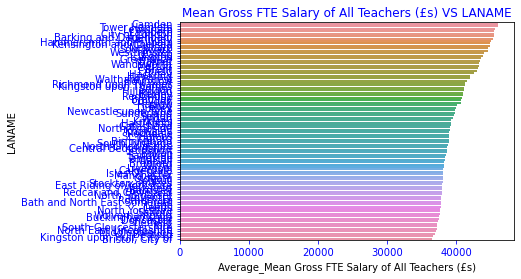

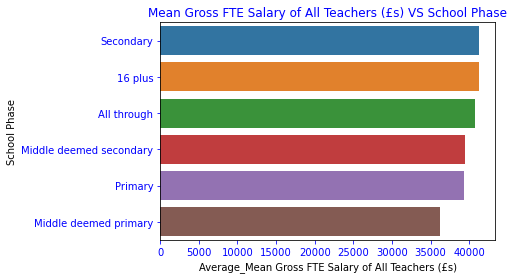

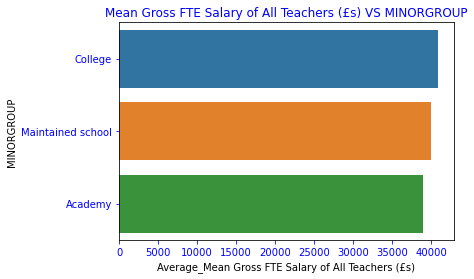

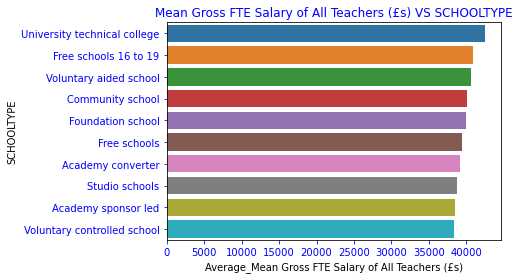

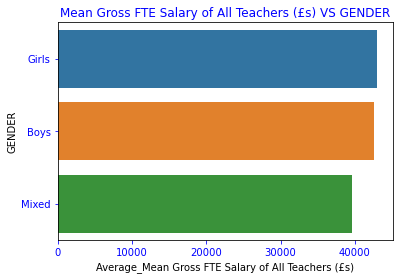

In [9]:
def state_and_continuous_factors(data,a,b):#a is the column with continuous factors,while b is the 
    # mean gross salary of teachers.
    # Group by state to find the average number of each continuous feature
    continuous_factors_by_state = data.groupby(a)[b].mean().sort_values(ascending = False)
    name='Average_'+b
    data_1 = continuous_factors_by_state.reset_index(name=name)
    sns.barplot(x=name,y=a,data=data_1)
    title=b+' VS '+a
    plt.title(title,color='blue')
    plt.tick_params(color='blue',labelcolor='blue')
    plt.show()
    
continuous_list = ['LANAME','School Phase','MINORGROUP','SCHOOLTYPE','GENDER']
for i in continuous_list:
    state_and_continuous_factors(df,i,'Mean Gross FTE Salary of All Teachers (£s)')

### Exploring the The relationship between mean gross salary against Total Number of Teachers,Total Number of Teaching Assistants,'Total Number of Non Classroom-based School Support Staff, Excluding Auxiliary Staff' and Pupil:Teacher Ratio

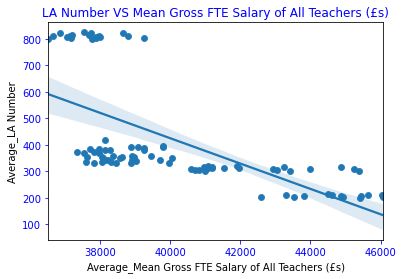

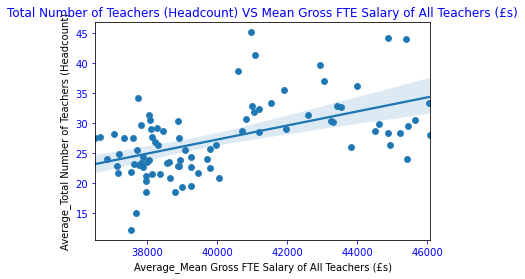

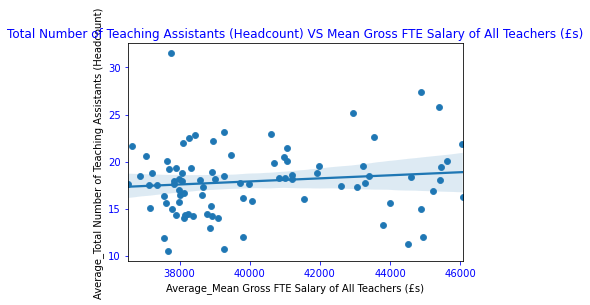

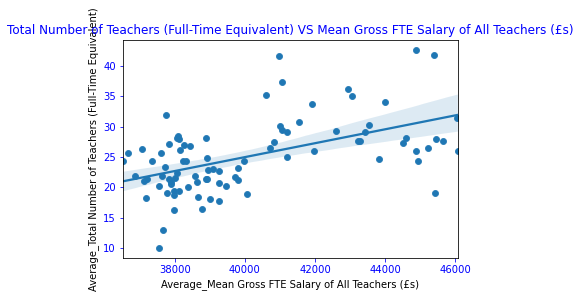

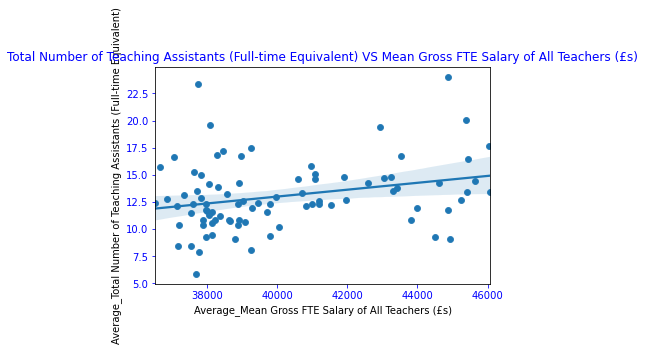

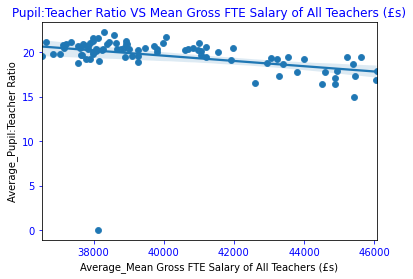

In [10]:
def continuous_and_continuous(data,a,b):# a is the mean gross salary column
    continuous_continuous_by_state = data.groupby('LA Number')[[a,b]].agg(['mean'])
    column1 = 'Average_'+a
    column2 = 'Average_'+b
    continuous_continuous_by_state.columns=[column1,column2]

    # Generate Scatterplot 
    sns.scatterplot(x = column1,y = column2,data = continuous_continuous_by_state)

    # Add a regression line on the plot
    sns.regplot(x = column1,y = column2,data = continuous_continuous_by_state)
    title = b+' VS '+ a
    plt.title(title,color='blue')
    plt.tick_params(color='blue',labelcolor='blue')
    plt.show()

list2 = ['LA Number','Total Number of Teachers (Headcount)','Total Number of Teaching Assistants (Headcount)',
         'Total Number of Teachers (Full-Time Equivalent)',
        'Total Number of Teaching Assistants (Full-time Equivalent)','Pupil:Teacher Ratio']
for i in list2:
    continuous_and_continuous(df,'Mean Gross FTE Salary of All Teachers (£s)',i)

#### From the plots above the following is can be denuded 
* Teachers Handling more students earn slightly less 
* The number of teachers per location is also directly proportional to average salary of the teachers.more teacher per lacation earn more average salary.
* The number of assistant staffs also impacts average teacher salary slightly. 

### Explore the relationship between Pupil:Teacher Ratio and Mean Gross FTE Salary of All Teachers (£s)

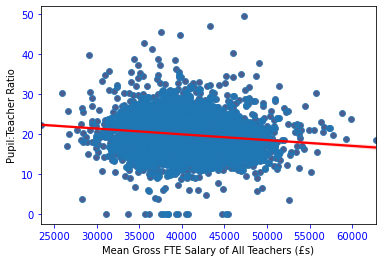

In [11]:
sns.scatterplot(x='Mean Gross FTE Salary of All Teachers (£s)',y='Pupil:Teacher Ratio',data=df,color='Red')
sns.regplot(x=df['Mean Gross FTE Salary of All Teachers (£s)'],y=df['Pupil:Teacher Ratio'],line_kws={"color":"r"})
plt.tick_params(color='blue',labelcolor='blue')
plt.show()

* From the Graph it is clear that though by a relatively small margin the teachers assigned more students earn less than those assigned less students.
* The relationship is linear

#### Proof of the following hypothesis
* Null hypothesis: price coefficient = 0 (no linear relationship)

* Alternative hypothesis: Mean Gross FTE Salary of All Teachers (£s) coefficient is non-zero

* alpha = 0.05

In [12]:
df['Ones'] = np.ones(( len(df), ))
Y = df['Pupil:Teacher Ratio']
X = df[['Mean Gross FTE Salary of All Teachers (£s)','Pupil:Teacher Ratio']]
result = sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Pupil:Teacher Ratio   R-squared (uncentered):                   1.000
Model:                             OLS   Adj. R-squared (uncentered):              1.000
Method:                  Least Squares   F-statistic:                          3.673e+33
Date:                 Thu, 25 Feb 2021   Prob (F-statistic):                        0.00
Time:                         12:26:35   Log-Likelihood:                      2.4263e+05
No. Observations:                 8072   AIC:                                 -4.853e+05
Df Residuals:                     8070   BIC:                                 -4.852e+05
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Mean Gross FTE Salary of All Teachers (£s)  3.117e-19   2.61e-20     11.924      0.000     2.6e-19    3.63e-19
Pupil:Teacher Ratio                            1.0000   5.11e-17   1.96e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      612.251   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2376.568
Skew:                          -0.300   Prob(JB):                         0.00
Kurtosis:                       5.589   Cond. No.                     8.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* p=0 < 0.5 so the hypothesis is rejected so the relationship is linear


## Relationship Between Location and Average salary 

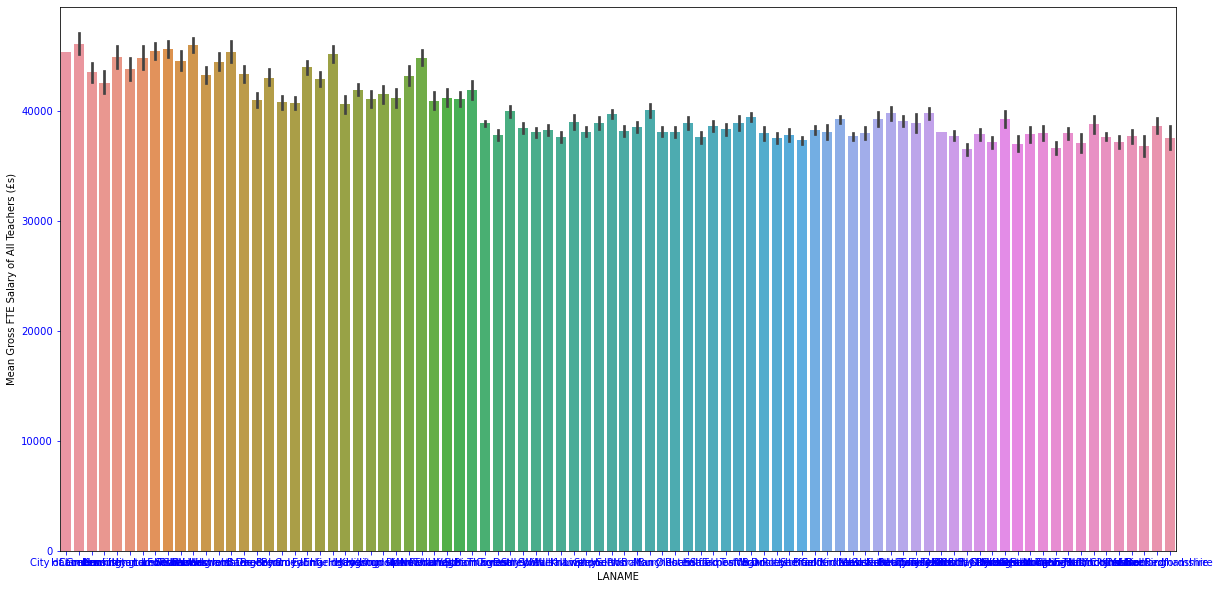

In [13]:
fig = plt.figure(figsize = (20,10))
sns.barplot(x = 'LANAME', y = 'Mean Gross FTE Salary of All Teachers (£s)', data = df)
plt.tick_params(color='blue',labelcolor='blue')
plt.show()

* The mdel got the highest Average GrosS FTE Salary of all Teachers in (£s) 

# Model Preparation

* Before the data is fed into the model int will need to have convert all the  string values to machine readable integers.
* To do this label encoding will be performed on the following Features

In [14]:
#Encode the categorical data using The stats model label encoder.
le = LabelEncoder()

df['LA Number'] = le.fit_transform(df['LA Number'])
df['MINORGROUP'] = le.fit_transform(df['MINORGROUP'])
df['School Phase'] = le.fit_transform(df['School Phase'])
df['SCHOOLTYPE'] = le.fit_transform(df['SCHOOLTYPE'])
df['GENDER'] = le.fit_transform(df['GENDER'])
df['SCHNAME'] = le.fit_transform(df['SCHNAME'])
f_df=df.drop('LANAME',axis=1)
print(f_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8072 entries, 0 to 8176
Data columns (total 16 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   LA Number                                                                                                   8072 non-null   int64  
 1   URN                                                                                                         8072 non-null   int64  
 2   School Phase                                                                                                8072 non-null   int64  
 3   Total Number of Teachers (Headcount)                                                                        8072 non-null   float64
 4   Total Number of Teaching Assistants (Headcount)                   

# Model Selection

* The dataset that the modek will use has multiple columns of discontinuous data, therefore applying one hot encoding would create a dimensionality crisis for a regression model. The alternative used was label encoding.  The main task for the model is to correctly predict accurate mean average teacher salary, when provided with the features.
* The first model to be used will be a linear regression model.
* Since the desired output is not categorical therefore classification models such as logistic regression will not be used
* Clustering models will also be avoided because of the high dimension expected when one hot encoding is applied to the data resulting to high computation cost. 

## Linear Regression

### Feature Engineering

#### Finding the correlation between variables

<AxesSubplot:>

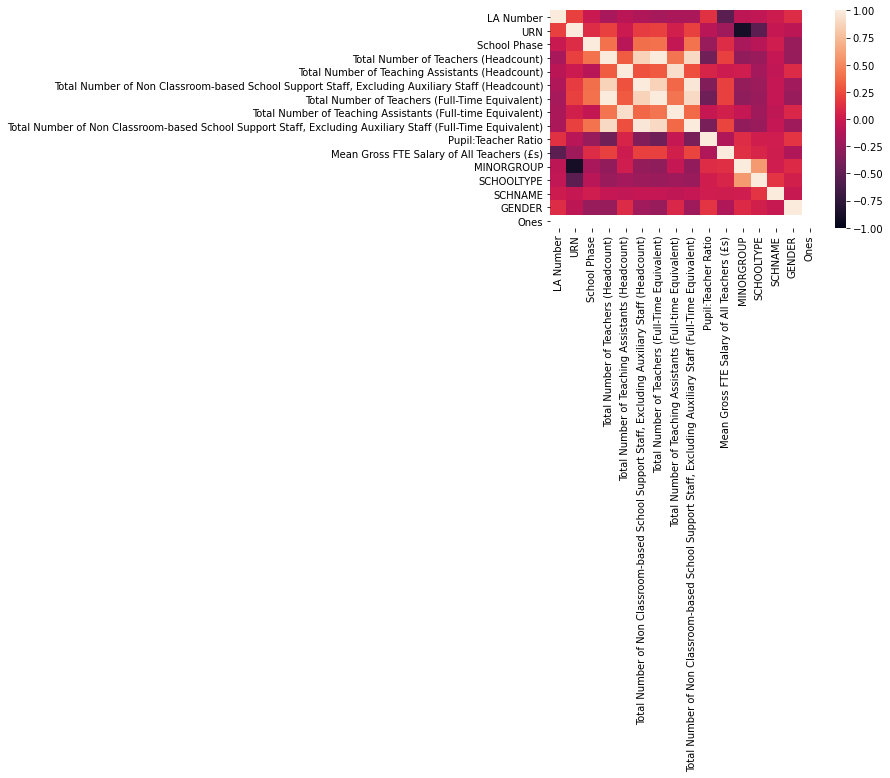

In [15]:
# Train will be 75% of the data and test 25%
df = f_df.copy()
# LETS find out which of the values have strong correlation and drop them
sns.heatmap(df.corr(),vmin=-1, vmax=1)

### splitting data into train and test datasets

In [16]:
#Defining X and Y values
df = f_df.copy()
y = df[['Mean Gross FTE Salary of All Teachers (£s)']].values.reshape(-1)
X = df.drop(['URN','Total Number of Non Classroom-based School Support Staff, Excluding Auxiliary Staff (Full-Time Equivalent)',
             'Total Number of Teaching Assistants (Full-time Equivalent)','Total Number of Teachers (Full-Time Equivalent)',
             'Mean Gross FTE Salary of All Teachers (£s)','Ones'],axis=1)

X = X.values.copy()
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.25,random_state=0)

#Training the model via stats model OLS api
model = sm.OLS(y_train,add_constant(X_train)).fit()
print(result.summary(),'\n')

#making Predictions with the model
ypred= model.predict(add_constant(X_test))
print('Mean Squared Error =>',mse(ypred,y_test),'\n') 
print('Mean Absolute Error =>',mean_absolute_error(ypred,y_test),'\n')

                                 OLS Regression Results                                 
Dep. Variable:     Pupil:Teacher Ratio   R-squared (uncentered):                   1.000
Model:                             OLS   Adj. R-squared (uncentered):              1.000
Method:                  Least Squares   F-statistic:                          3.673e+33
Date:                 Thu, 25 Feb 2021   Prob (F-statistic):                        0.00
Time:                         12:26:38   Log-Likelihood:                      2.4263e+05
No. Observations:                 8072   AIC:                                 -4.853e+05
Df Residuals:                     8070   BIC:                                 -4.852e+05
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
                                                 coef    std err          t      P>|t|      [0.025      0.975]

* The ols api's model manages to gets a MAE of 2366.93, This is about 2.4k £ off. Lets find out which features are the most important, are the highest contributors for this perfomance And those that are worst. Note that some highly correlated data were dropped prior the definition of X and Y variables to better the perfomance.

* To find out the highest contributing features two techniques will be used, 1.) Correlation Feature selection. 2.) Mutual Information Feature selection.

## Decision Tree

In [17]:
#Splitting data into train and test 
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y, test_size=0.25, random_state=0)

#Training the DTR model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

#making predictions
ypred = regressor.predict(X_test)
print('Mean Squared Error =>',mse(ypred,y_test),'\n') 
print('Mean Absolute Error =>',mean_absolute_error(ypred,y_test),'\n')

Mean Squared Error => 15948243.783448959 

Mean Absolute Error => 2968.601090188305 



The Linear Regression model produced better results than the decission tree model. So its picked for further analysis below

Feature 0: 2198.892730
Feature 1: 72.898157
Feature 2: 234.678918
Feature 3: 1.042410
Feature 4: 237.517457
Feature 5: 84.895177
Feature 6: 99.108769
Feature 7: 33.682714
Feature 8: 3.163532
Feature 9: 121.178165


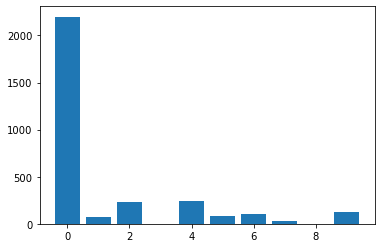

In [18]:
#correlation feature selection for numerical data

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.266601
Feature 1: 0.021448
Feature 2: 0.019830
Feature 3: 0.000000
Feature 4: 0.028205
Feature 5: 0.020002
Feature 6: 0.009453
Feature 7: 0.019644
Feature 8: 0.005649
Feature 9: 0.012325


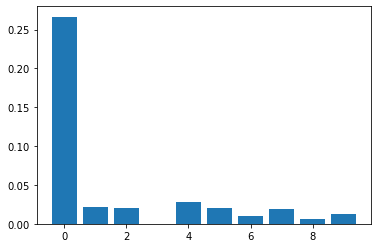

In [19]:
#mutual information feature selection for numerical input datafrom sklearn.datasets import make_regression

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

* From the two bar graphs we see that The LA number is the largest contributor. Therefore location is a great factor for a tearchers salary alocation followed by the number of non-classroom school-support stuff. At third place is the puil to teacher ratio.
* The best features perform as follows when used in a regression model.
* Checking for any other combination that can produce a lower MAE and or Mean quared Error.

In [20]:
# evaluation of a model using 10 features chosen with correlation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 2354.673


In [21]:
# evaluation of a model using 10 features chosen with mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 2354.673


* The resulting MAE in both models is similar and is quite close to the original. 
ie Original= 2366.9336435690216, Coefficients MAE == mutual_relation MAE = 2354.673. 


In [22]:
# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# define dataset
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-10, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -2347.891
Best Config: {'sel__k': 10}
>nan with: {'sel__k': 0}
>-2443.742 with: {'sel__k': 1}
>-2415.830 with: {'sel__k': 2}
>-2407.402 with: {'sel__k': 3}
>-2396.996 with: {'sel__k': 4}
>-2388.565 with: {'sel__k': 5}
>-2384.119 with: {'sel__k': 6}
>-2374.836 with: {'sel__k': 7}
>-2369.282 with: {'sel__k': 8}
>-2359.104 with: {'sel__k': 9}
>-2347.891 with: {'sel__k': 10}


>1 -2443.742 (47.447)
>2 -2418.911 (48.373)
>3 -2403.364 (50.887)
>4 -2396.022 (50.505)
>5 -2387.739 (52.416)
>6 -2384.119 (52.733)
>7 -2375.909 (51.494)
>8 -2370.244 (55.395)
>9 -2359.104 (54.968)
>10 -2347.891 (55.845)


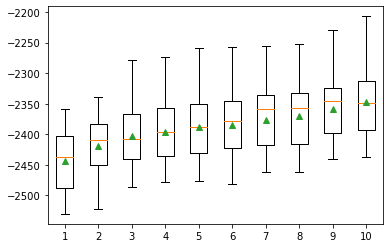

In [23]:
# compare different numbers of features selected using mutual information
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# define dataset
# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-9, X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

### Results and Conclusion
* Using the 10 best features, The Linear Regression Model outputs the lowest MAE and or Mean Squared Error attainable from the given feaatures.
* Teachers Go through many challenges as we saw earlier. The model shows that School locations contribute the most to how much a teacher earns and to a lesser account the Teacher to pupils Ratio. That being said its evident that their is a great possibility of a teacher who handles more students being paid less than those handling less which implies that there extra effort That may go underpaid. Tackling This will surely lead to the recognition of the forgotten hard working Teachers, Therefore a happier Teachers with well desearving salaries.

### Real World Application

This model can be used by the Education Department to better allocate well deserving salaries to our Teachers, Hence improve on their mental and physical health ie(Those that work more and harder will get a fair return inform of salary). This model is relarively light and very flexible in nature. That being said. Our tech team can easily tweak the features( add remove available features to be more task specific (reduce generality) when need arises.